Exploring Hacker News Posts
In this project we're specifically interested in posts whose titles begin with either Ask HN or Show HN. 

* Users submit Ask HN posts to ask the Hacker News community a specific question.
* Users submit Show HN posts to show the Hacker News community a project, product, or just generally something interesting. 

We will analyze which type of post and time receive the most comments on average i.e we need to advise on best hour to maximize the amount of comments a post receives

Our aim is to compare these two types of posts to determine the following:

1. Do Ask HN or Show HN receive more comments on average?
2. Do posts created at a certain time receive more comments on average?



## Task #1: 
> Most Number Of Comments On Avg (Ask or Show ?)




## Task #2: 
> Now we will find average comments again but now we will do it wrt hours.
> Target is to know when to ask something on website (so we can get good response).
> By knowing the time we can engage more people and target more human traffic

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("./hacker_news.csv")
dataset

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
2,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
3,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12
4,10482257,Title II kills investment? Comcast and other I...,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,10/31/2015 9:48
...,...,...,...,...,...,...,...
20094,12379592,How Purism Avoids Intels Active Management Tec...,https://puri.sm/philosophy/how-purism-avoids-i...,10,6,AdmiralAsshat,8/29/2016 2:22
20095,10339284,YC Application Translated and Broken Down,https://medium.com/@zreitano/the-yc-applicatio...,4,1,zreitano,10/6/2015 14:57
20096,10824382,Microkernels are slow and Elvis didn't do no d...,http://blog.darknedgy.net/technology/2016/01/0...,169,132,vezzy-fnord,1/2/2016 0:49
20097,10739875,How Product Hunt really works,https://medium.com/@benjiwheeler/how-product-h...,695,222,brw12,12/15/2015 19:32


## Task #1

In [3]:
ask_HN = dataset[dataset['title'].str.startswith('Ask HN')]
ask_HN.head()

,id,title,url,num_points,num_comments,author,created_at
6,12296411,Ask HN: How to improve my personal website?,NaN,2,6,ahmedbaracat,8/16/2016 9:55
16,10610020,Ask HN: Am I the only one outraged by Twitter ...,NaN,28,29,tkfx,11/22/2015 13:43
21,11610310,Ask HN: Aby recent changes to CSS that broke m...,NaN,1,1,polskibus,5/2/2016 10:14
29,12210105,Ask HN: Looking for Employee #3 How do I do it?,NaN,1,3,sph130,8/2/2016 14:20
30,10394168,Ask HN: Someone offered to buy my browser exte...,NaN,28,17,roykolak,10/15/2015 16:38


In [4]:
show_HN = dataset[dataset['title'].str.startswith('Show HN')]
show_HN.head()

,id,title,url,num_points,num_comments,author,created_at
12,10627194,Show HN: Wio Link ESP8266 Based Web of Things...,https://iot.seeed.cc,26,22,kfihihc,11/25/2015 14:03
38,10646440,Show HN: Something pointless I made,http://dn.ht/picklecat/,747,102,dhotson,11/29/2015 22:46
45,11590768,"Show HN: Shanhu.io, a programming playground p...",https://shanhu.io,1,1,h8liu,4/28/2016 18:05
83,12178806,Show HN: Webscope Easy way for web developers...,http://webscopeapp.com,3,3,fastbrick,7/28/2016 7:11
96,10872799,Show HN: GeoScreenshot Easily test Geo-IP bas...,https://www.geoscreenshot.com/,1,9,kpsychwave,1/9/2016 20:45


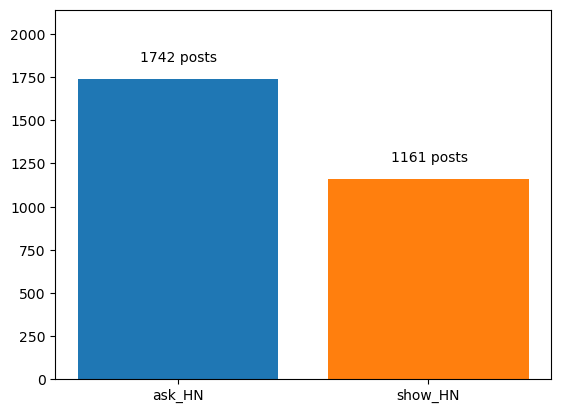

In [5]:
max_value = max(len(ask_HN), len(show_HN))
plt.ylim((0, max_value + 400))

plt.bar('ask_HN', len(ask_HN))
plt.bar('show_HN', len(show_HN))

ask_HN_text = str(len(ask_HN)) + " posts"
show_HN_text = str(len(show_HN)) + " posts"

plt.text(-0.15, len(ask_HN) + 100, ask_HN_text, fontsize=10)
plt.text(0.85, len(show_HN) + 100, show_HN_text, fontsize=10)

plt.savefig('Maximum_posts.jpg', format='jpg')
plt.show()

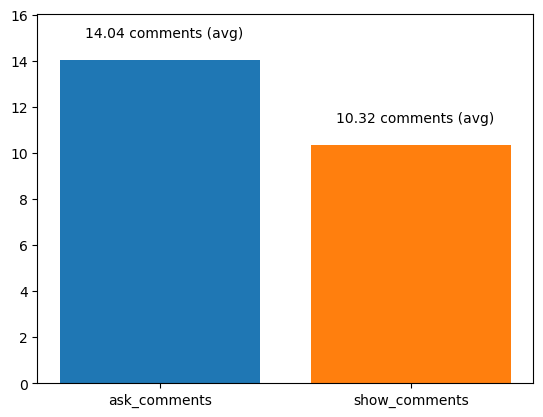

In [6]:
avg_ask_HN_cmnts = (ask_HN.num_comments.sum())/len(ask_HN.num_comments)
avg_show_HN_cmnts = (show_HN.num_comments.sum())/len(show_HN.num_comments)

plt.bar('ask_comments', avg_ask_HN_cmnts)
plt.bar('show_comments', avg_show_HN_cmnts)

max_value = max(avg_ask_HN_cmnts, avg_show_HN_cmnts)
plt.ylim((0, max_value + 2))

ask_comments_text = str(round(avg_ask_HN_cmnts, 2)) + " comments (avg)"
show_comments_text = str(round(avg_show_HN_cmnts, 2)) + " comments (avg)"

plt.text(-0.3, avg_ask_HN_cmnts + 1, ask_comments_text, fontsize=10)
plt.text(0.7, avg_show_HN_cmnts + 1, show_comments_text, fontsize=10)


plt.savefig('Average_posts_comments.jpg', format='jpg')
plt.show()

## Task #2

In [7]:
ask_cmnts = ask_HN[['num_comments', 'created_at']]
show_cmnts = show_HN[['num_comments', 'created_at']]

In [8]:
ask_cmnts.head()

,num_comments,created_at
6,6,8/16/2016 9:55
16,29,11/22/2015 13:43
21,1,5/2/2016 10:14
29,3,8/2/2016 14:20
30,17,10/15/2015 16:38


In [9]:
show_cmnts.head()

,num_comments,created_at
12,22,11/25/2015 14:03
38,102,11/29/2015 22:46
45,1,4/28/2016 18:05
83,3,7/28/2016 7:11
96,9,1/9/2016 20:45


In [10]:
ask_cmnts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1742 entries, 6 to 20060
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   num_comments  1742 non-null   int64 
 1   created_at    1742 non-null   object
dtypes: int64(1), object(1)
memory usage: 40.8+ KB


In [11]:
show_cmnts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 12 to 20069
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   num_comments  1161 non-null   int64 
 1   created_at    1161 non-null   object
dtypes: int64(1), object(1)
memory usage: 27.2+ KB


In [12]:
ask_cmnts['created_at'] = pd.to_datetime(ask_cmnts.created_at)
show_cmnts['created_at'] = pd.to_datetime(show_cmnts.created_at)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11012\910212860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ask_cmnts['created_at'] = pd.to_datetime(ask_cmnts.created_at)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11012\910212860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show_cmnts['created_at'] = pd.to_datetime(show_cmnts.created_at)


In [13]:
ask_cmnts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1742 entries, 6 to 20060
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   num_comments  1742 non-null   int64         
 1   created_at    1742 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 40.8 KB


In [14]:
show_cmnts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 12 to 20069
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   num_comments  1161 non-null   int64         
 1   created_at    1161 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 27.2 KB


In [15]:
# ask_cmnts['hours'] = ask_cmnts.created_at.dt.strftime('%I %p')
# show_cmnts['hours'] = show_cmnts.created_at.dt.strftime('%I %p')
ask_cmnts['hours'] = ask_cmnts.created_at.dt.hour
show_cmnts['hours'] = show_cmnts.created_at.dt.hour

ask_cmnts.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11012\1766429826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ask_cmnts['hours'] = ask_cmnts.created_at.dt.hour
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11012\1766429826.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show_cmnts['hours'] = show_cmnts.created_at.dt.hour


,num_comments,created_at,hours
6,6,2016-08-16 09:55:00,9
16,29,2015-11-22 13:43:00,13
21,1,2016-05-02 10:14:00,10
29,3,2016-08-02 14:20:00,14
30,17,2015-10-15 16:38:00,16


In [16]:
show_cmnts.head()

,num_comments,created_at,hours
12,22,2015-11-25 14:03:00,14
38,102,2015-11-29 22:46:00,22
45,1,2016-04-28 18:05:00,18
83,3,2016-07-28 07:11:00,7
96,9,2016-01-09 20:45:00,20


In [17]:
ask_comments_hours = ask_cmnts.pivot_table(index = 'hours', values = 'num_comments', aggfunc='mean')
show_comments_hours = show_cmnts.pivot_table(index = 'hours', values = 'num_comments', aggfunc='mean')

ask_comments_hours

,num_comments
hours,
0,8.129630
1,11.383333
2,23.810345
3,7.796296
4,7.170213
5,10.086957
6,9.022727
7,7.852941
8,10.250000


In [18]:
show_comments_hours

,num_comments
hours,
0,15.709677
1,8.785714
2,4.233333
3,10.629630
4,9.500000
5,3.052632
6,8.875000
7,11.500000
8,4.852941


In [19]:
ask_comments_hours.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_comments  24 non-null     float64
dtypes: float64(1)
memory usage: 384.0 bytes


In [20]:
ask_comments_hours = ask_comments_hours.reset_index()
show_comments_hours = show_comments_hours.reset_index()

ask_comments_hours.head()

,hours,num_comments
0,0,8.129630
1,1,11.383333
2,2,23.810345
3,3,7.796296
4,4,7.170213


In [21]:
ask_comments_hours['hours'] = pd.to_datetime(ask_comments_hours['hours'].astype(str), format='%H').dt.strftime('%I %p')
show_comments_hours['hours'] = pd.to_datetime(show_comments_hours['hours'].astype(str), format='%H').dt.strftime('%I %p')

ask_comments_hours.head()

,hours,num_comments
0,12 AM,8.129630
1,01 AM,11.383333
2,02 AM,23.810345
3,03 AM,7.796296
4,04 AM,7.170213


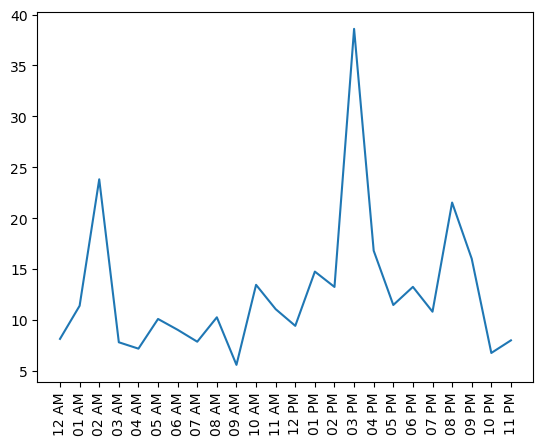

In [22]:
plt.xticks(range(0, 24, 1), rotation = 90)

plt.plot(ask_comments_hours.hours, ask_comments_hours.num_comments)

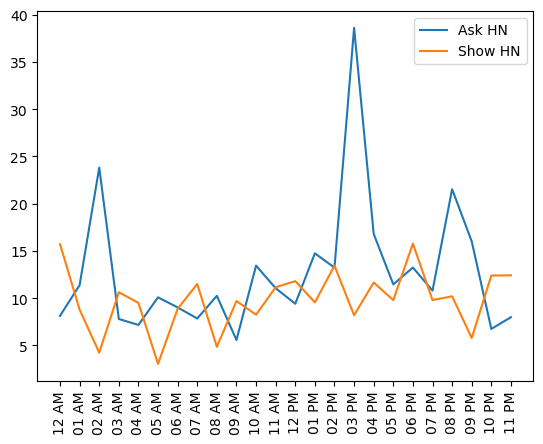

In [23]:
plt.xticks(range(0, 24, 1), rotation = 90)

plt.plot(ask_comments_hours.hours, ask_comments_hours.num_comments, label = "Ask HN")
plt.plot(show_comments_hours.hours, show_comments_hours.num_comments, label = "Show HN")

plt.legend()
plt.show()

In [24]:
ask_comments_hours[ask_comments_hours['num_comments'] == max(ask_comments_hours.num_comments)]

,hours,num_comments
15,03 PM,38.594828


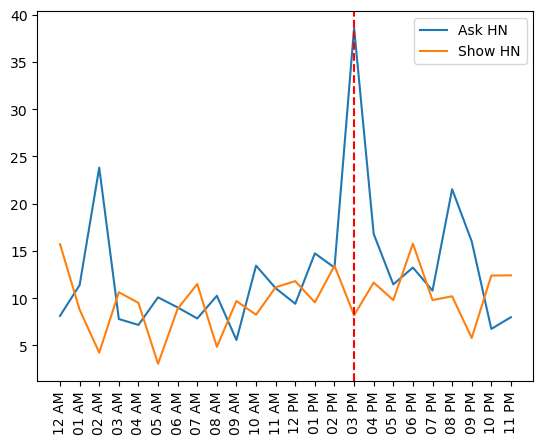

In [25]:
plt.xticks(range(0, 24, 1), rotation = 90)

plt.plot(ask_comments_hours.hours, ask_comments_hours.num_comments, label = "Ask HN")
plt.plot(show_comments_hours.hours, show_comments_hours.num_comments, label = "Show HN")

plt.axvline(x=15, color='red', linestyle='--')

plt.legend()

plt.savefig('Best_response_time.jpg', format='jpg')
plt.show()

## Conclusions:
From above analysis, we can deduct that:
* There are greater number of Ask HN post i.e., `1742` than the Show HN posts i.e., 1161.
* There are greater number on Ask HN post on average `14.04` at each post than the Show HN posts on average 10.32 at each post.
* We deduct from the above graph that, if we do a post of Ask HN at `3PM`, it will get the **maximum** response (comments).